In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# reference 

<a href="https://github.com/ageron/handson-ml/">Hands-On Machine Learning with Scikit-Learn and TensorFlow</a>

# create a series

In [2]:
pd.Series([0, 1, 2, 3])

0    0
1    1
2    2
3    3
dtype: int64

# name

In [3]:
pd.Series([0, 1, 2, 3], name="my_ser")

0    0
1    1
2    2
3    3
Name: my_ser, dtype: int64

# index labels

In [4]:
ser = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"])
ser

a    0
b    1
c    2
d    3
dtype: int64

In [5]:
ser.loc["b"]

1

In [6]:
ser.iloc[1]

1

In [7]:
ser["b"]

1

In [8]:
ser[1]

1

# init from dict

In [9]:
pd.Series({"a": 0, "b": 1, "c": 2, "d": 3})

a    0
b    1
c    2
d    3
dtype: int64

In [10]:
pd.Series({"a": 0, "b": 1, "c": 2, "d": 3}, index = ["a", "c"])

a    0
c    2
dtype: int64

# automatic alignment

In [11]:
ser_0 = pd.Series({"a": 0, "b": 1, "c": 2, "d": 3})
ser_1 = pd.Series({"d": 30, "c": 20, "b": 10, "a": 0})
ser_0 + ser_1

a     0
b    11
c    22
d    33
dtype: int64

In [12]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [13]:
array = [
    [40, 50, 60],
    [70, 80, 90],
    [100, 110, 120]
]
other_dataFrame = pd.DataFrame(
    array,
    columns=["two", "three", "four"],
    index=["b", "c", "d"]
)
other_dataFrame

,two,three,four
b,40,50,60
c,70,80,90
d,100,110,120


In [14]:
dataFrame + other_dataFrame

,four,one,three,two
a,NaN,NaN,NaN,NaN
b,NaN,NaN,55.0,44.0
c,NaN,NaN,88.0,77.0
d,NaN,NaN,NaN,NaN


In [15]:
(dataFrame + other_dataFrame).fillna(0)

,four,one,three,two
a,0.0,0.0,0.0,0.0
b,0.0,0.0,55.0,44.0
c,0.0,0.0,88.0,77.0
d,0.0,0.0,0.0,0.0


In [16]:
(dataFrame + other_dataFrame).interpolate()

,four,one,three,two
a,NaN,NaN,NaN,NaN
b,NaN,NaN,55.0,44.0
c,NaN,NaN,88.0,77.0
d,NaN,NaN,88.0,77.0


# init with a scalar

In [17]:
pd.Series(3, ["a", "b", "c", "d"])

a    3
b    3
c    3
d    3
dtype: int64

# plotting a series

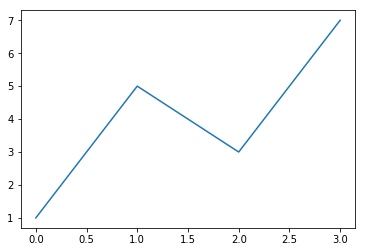

In [18]:
ser = pd.Series([1, 5, 3, 7])
ser.plot()
plt.show()

# time range

In [19]:
date_range = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
date_range

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
ser = pd.Series(np.random.random(12), date_range)
ser

2016-10-29 17:30:00    0.470061
2016-10-29 18:30:00    0.236548
2016-10-29 19:30:00    0.899913
2016-10-29 20:30:00    0.795758
2016-10-29 21:30:00    0.148635
2016-10-29 22:30:00    0.764035
2016-10-29 23:30:00    0.956703
2016-10-30 00:30:00    0.523343
2016-10-30 01:30:00    0.516990
2016-10-30 02:30:00    0.516502
2016-10-30 03:30:00    0.298775
2016-10-30 04:30:00    0.600363
Freq: H, dtype: float64

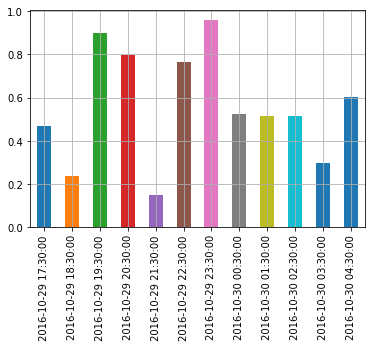

In [21]:
ser.plot(kind="bar")
plt.grid(True)
plt.show()

# resampling

In [22]:
resampling_ser = ser.resample("2H").mean()
resampling_ser

2016-10-29 16:00:00    0.470061
2016-10-29 18:00:00    0.568231
2016-10-29 20:00:00    0.472196
2016-10-29 22:00:00    0.860369
2016-10-30 00:00:00    0.520167
2016-10-30 02:00:00    0.407638
2016-10-30 04:00:00    0.600363
Freq: 2H, dtype: float64

In [23]:
resampling_ser = ser.resample("2H").apply(np.min)
resampling_ser

2016-10-29 16:00:00    0.470061
2016-10-29 18:00:00    0.236548
2016-10-29 20:00:00    0.148635
2016-10-29 22:00:00    0.764035
2016-10-30 00:00:00    0.516990
2016-10-30 02:00:00    0.298775
2016-10-30 04:00:00    0.600363
Freq: 2H, dtype: float64

In [24]:
resampling_ser = ser.resample("15Min").mean()
resampling_ser.head()

2016-10-29 17:30:00    0.470061
2016-10-29 17:45:00         NaN
2016-10-29 18:00:00         NaN
2016-10-29 18:15:00         NaN
2016-10-29 18:30:00    0.236548
Freq: 15T, dtype: float64

In [25]:
resampling_ser = ser.resample("15Min").interpolate(method="cubic")
resampling_ser.head()

2016-10-29 17:30:00    0.470061
2016-10-29 17:45:00    0.219072
2016-10-29 18:00:00    0.117162
2016-10-29 18:15:00    0.133323
2016-10-29 18:30:00    0.236548
Freq: 15T, dtype: float64

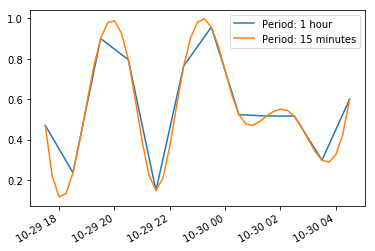

In [26]:
ser.plot(label="Period: 1 hour")
resampling_ser.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

# timezone

In [27]:
tomezone_ser = ser.tz_localize("Asia/Taipei")
tomezone_ser

2016-10-29 17:30:00+08:00    0.470061
2016-10-29 18:30:00+08:00    0.236548
2016-10-29 19:30:00+08:00    0.899913
2016-10-29 20:30:00+08:00    0.795758
2016-10-29 21:30:00+08:00    0.148635
2016-10-29 22:30:00+08:00    0.764035
2016-10-29 23:30:00+08:00    0.956703
2016-10-30 00:30:00+08:00    0.523343
2016-10-30 01:30:00+08:00    0.516990
2016-10-30 02:30:00+08:00    0.516502
2016-10-30 03:30:00+08:00    0.298775
2016-10-30 04:30:00+08:00    0.600363
Freq: H, dtype: float64

In [28]:
tomezone_ser = ser.tz_localize("America/New_York").tz_convert("Europe/Paris")
tomezone_ser

2016-10-29 23:30:00+02:00    0.470061
2016-10-30 00:30:00+02:00    0.236548
2016-10-30 01:30:00+02:00    0.899913
2016-10-30 02:30:00+02:00    0.795758
2016-10-30 02:30:00+01:00    0.148635
2016-10-30 03:30:00+01:00    0.764035
2016-10-30 04:30:00+01:00    0.956703
2016-10-30 05:30:00+01:00    0.523343
2016-10-30 06:30:00+01:00    0.516990
2016-10-30 07:30:00+01:00    0.516502
2016-10-30 08:30:00+01:00    0.298775
2016-10-30 09:30:00+01:00    0.600363
Freq: H, dtype: float64

In [29]:
try:
    tomezone_ser.tz_localize(None).tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from '2016-10-30 02:30:00', try using the 'ambiguous' argument


In [30]:
tomezone_ser.tz_localize(None).tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    0.470061
2016-10-30 00:30:00+02:00    0.236548
2016-10-30 01:30:00+02:00    0.899913
2016-10-30 02:30:00+02:00    0.795758
2016-10-30 02:30:00+01:00    0.148635
2016-10-30 03:30:00+01:00    0.764035
2016-10-30 04:30:00+01:00    0.956703
2016-10-30 05:30:00+01:00    0.523343
2016-10-30 06:30:00+01:00    0.516990
2016-10-30 07:30:00+01:00    0.516502
2016-10-30 08:30:00+01:00    0.298775
2016-10-30 09:30:00+01:00    0.600363
Freq: H, dtype: float64

# period

In [31]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [32]:
quarters + 1

PeriodIndex(['2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4', '2018Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [33]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

In [34]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

In [35]:
ser = pd.Series(np.random.random(8), index = quarters)
ser

2016Q1    0.035708
2016Q2    0.482900
2016Q3    0.281332
2016Q4    0.473792
2017Q1    0.550548
2017Q2    0.470027
2017Q3    0.368971
2017Q4    0.121249
Freq: Q-DEC, dtype: float64

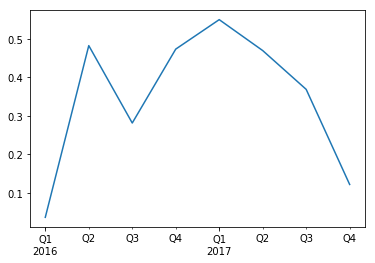

In [36]:
ser.plot(kind="line")
plt.show()

In [37]:
timestamp_ser = ser.to_timestamp(how="end", freq="H")
timestamp_ser

2016-03-31 23:00:00    0.035708
2016-06-30 23:00:00    0.482900
2016-09-30 23:00:00    0.281332
2016-12-31 23:00:00    0.473792
2017-03-31 23:00:00    0.550548
2017-06-30 23:00:00    0.470027
2017-09-30 23:00:00    0.368971
2017-12-31 23:00:00    0.121249
Freq: Q-DEC, dtype: float64

In [38]:
timestamp_ser.to_period()

2016Q1    0.035708
2016Q2    0.482900
2016Q3    0.281332
2016Q4    0.473792
2017Q1    0.550548
2017Q2    0.470027
2017Q3    0.368971
2017Q4    0.121249
Freq: Q-DEC, dtype: float64

# create a dataframe

In [39]:
dictionary = {
    "one": pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"]),
    "two": pd.Series(["AA", "BB"], index=["b", "d"]),
    "three": pd.Series([20.0, 30.0], index=["c", "d"])
}
dataFrame = pd.DataFrame(dictionary)
dataFrame

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20.0
d,3,BB,30.0


In [40]:
dictionary = {
    "one": {"a" : 0, "b" : 1, "c" : 2, "d" : 3},
    "two": {"b" : "AA", "d" : "BB"},
    "three": {"c" : 20.0, "d" : 30.0}
}
dataFrame = pd.DataFrame(dictionary)
dataFrame

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20.0
d,3,BB,30.0


In [41]:
dataFrame.loc["d"]

one       3
two      BB
three    30
Name: d, dtype: object

In [42]:
dataFrame.iloc[3]

one       3
two      BB
three    30
Name: d, dtype: object

In [43]:
dataFrame["one"]

a    0
b    1
c    2
d    3
Name: one, dtype: int64

In [44]:
dataFrame[["one", "three"]]

,one,three
a,0,NaN
b,1,NaN
c,2,20.0
d,3,30.0


In [45]:
new_dataFrame = pd.DataFrame(
        dictionary,
        columns=["one", "three"],
        index=["c", "d"]
     )
new_dataFrame

,one,three
c,2,20.0
d,3,30.0


In [46]:
array = [
    [0, np.nan, np.nan],
    [1, "AA", np.nan],
    [2, np.nan, 20.0],
    [3, "BB", 30.0]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c", "d"]
)
dataFrame

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20.0
d,3,BB,30.0


In [47]:
dataFrame_from_dataFrame = pd.DataFrame(
    dataFrame,
    columns=["one", "three"],
    index=["c", "d"]
)
dataFrame_from_dataFrame

,one,three
c,2,20.0
d,3,30.0


# add / delete column

In [48]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [49]:
dataFrame["four"] = dataFrame["three"] * 10
dataFrame

,one,two,three,four
a,0,1,2,20
b,3,4,5,50
c,6,7,8,80


In [50]:
dataFrame["five"] = pd.Series([30, 32, 33], index=["a", "c", "d"])
dataFrame

,one,two,three,four,five
a,0,1,2,20,30.0
b,3,4,5,50,NaN
c,6,7,8,80,32.0


In [51]:
dataFrame.insert(1, "six", [41, 42, 43])
dataFrame

,one,six,two,three,four,five
a,0,41,1,2,20,30.0
b,3,42,4,5,50,NaN
c,6,43,7,8,80,32.0


In [52]:
assigned_dataFrame = dataFrame.assign(
    seven = dataFrame["three"] * 50,
    eight = dataFrame["three"]  > 3
)
assigned_dataFrame

,one,six,two,three,four,five,seven,eight
a,0,41,1,2,20,30.0,100,False
b,3,42,4,5,50,NaN,250,True
c,6,43,7,8,80,32.0,400,True


In [53]:
assigned_dataFrame = dataFrame \
    .assign(night = lambda df : df["three"] * 60) \
    .assign(ten = lambda df : df["night"]  > 300)
assigned_dataFrame

,one,six,two,three,four,five,night,ten
a,0,41,1,2,20,30.0,120,False
b,3,42,4,5,50,NaN,300,False
c,6,43,7,8,80,32.0,480,True


In [54]:
dataFrame.pop("four")
dataFrame

,one,six,two,three,five
a,0,41,1,2,30.0
b,3,42,4,5,NaN
c,6,43,7,8,32.0


In [55]:
del dataFrame["three"]
dataFrame

,one,six,two,five
a,0,41,1,30.0
b,3,42,4,NaN
c,6,43,7,32.0


# masked

In [56]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
masked_array = np.ma.asarray(array, dtype=np.object)
masked_array[(0, 1), (0, 1)] = np.ma.masked
dataFrame = pd.DataFrame(
    masked_array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,NaN,1,2
b,3,NaN,5
c,6,7,8


# multi-indexing

In [57]:
dataFrame = pd.DataFrame({
    ("public", "birthyear"):{
        ("Paris","alice"):1985, 
        ("Paris","bob"): 1984, 
        ("London","charles"): 1992
    },
    ("public", "hobby"):{
        ("Paris","alice"):"Biking", 
        ("Paris","bob"): "Dancing"
    },
    ("private", "weight"):{
        ("Paris","alice"):68, 
        ("Paris","bob"): 83, 
        ("London","charles"): 112
    },
    ("private", "children"):{
        ("Paris", "alice"):np.nan, 
        ("Paris","bob"): 3, 
        ("London","charles"): 0
    }
})
dataFrame

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [58]:
dataFrame["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

In [59]:
dataFrame["public", "hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

In [60]:
dataFrame["public"]["hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: hobby, dtype: object

# drop level

In [61]:
dataFrame.columns = dataFrame.columns.droplevel(level = 0)
dataFrame

birthyear    hobby  weight  children
London charles       1992      NaN     112       0.0
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0

# transposing

In [62]:
dataFrame.T

London   Paris         
          charles   alice      bob
birthyear    1992    1985     1984
hobby         NaN  Biking  Dancing
weight        112      68       83
children        0     NaN        3

# stacking and unstacking

In [63]:
stacked_dataFrame = dataFrame.stack()
stacked_dataFrame

London  charles  birthyear       1992
                 weight           112
                 children           0
Paris   alice    birthyear       1985
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 hobby        Dancing
                 weight            83
                 children           3
dtype: object

In [64]:
unstacked_dataFrame = stacked_dataFrame.unstack()
unstacked_dataFrame

birthyear    hobby weight children
London charles      1992      NaN    112        0
Paris  alice        1985   Biking     68      NaN
       bob          1984  Dancing     83        3

# evaluating

In [65]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [66]:
dataFrame.eval("one * 2")

a     0
b     6
c    12
dtype: int64

In [67]:
parameter = 2
dataFrame.eval("one * @parameter")

a     0
b     6
c    12
dtype: int64

In [68]:
dataFrame.query("one > 0 and two == 4")

,one,two,three
b,3,4,5


# sorting a dataframe

In [69]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["three", "two", "one"],
    index=["c", "b", "a"]
)
dataFrame

,three,two,one
c,0,1,2
b,3,4,5
a,6,7,8


In [70]:
dataFrame.sort_index(ascending=True)

,three,two,one
a,6,7,8
b,3,4,5
c,0,1,2


In [71]:
dataFrame.sort_index(axis=1, ascending=True)

,one,three,two
c,2,0,1
b,5,3,4
a,8,6,7


In [72]:
dataFrame.sort_values(by="one", ascending=False)

,three,two,one
a,6,7,8
b,3,4,5
c,0,1,2


# plotting a dataframe

In [73]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


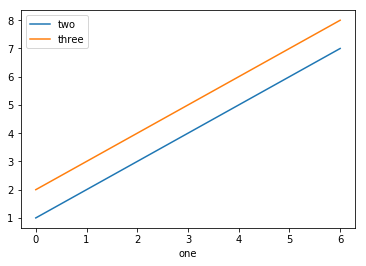

In [74]:
dataFrame.plot(kind = "line", x = "one", y = ["two", "three"])
plt.show()

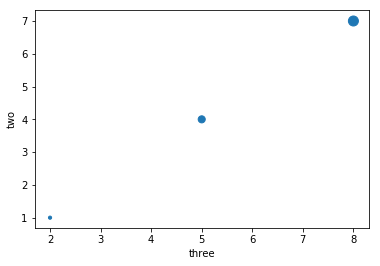

In [75]:
dataFrame.plot(kind = "scatter", x = "three", y = "two", s=[10, 50, 100])
plt.show()

# operation

In [76]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [77]:
(dataFrame % 3 == 0).all()

one       True
two      False
three    False
dtype: bool

In [78]:
(dataFrame > 3).all(axis = 1)

a    False
b    False
c     True
dtype: bool

In [79]:
(dataFrame > 3).any(axis = 1)

a    False
b     True
c     True
dtype: bool

In [80]:
dataFrame - dataFrame.mean()

,one,two,three
a,-3.0,-3.0,-3.0
b,0.0,0.0,0.0
c,3.0,3.0,3.0


In [81]:
dataFrame.values.mean()

4.0

In [82]:
dataFrame["four"] = ["A", "B", "A"]
dataFrame["five"] = ["a", "a", "b"]
dataFrame["six"] = ["X", "Y", "Z"]
dataFrame

,one,two,three,four,five,six
a,0,1,2,A,a,X
b,3,4,5,B,a,Y
c,6,7,8,A,b,Z


In [83]:
dataFrame.groupby("four").mean()

,one,two,three
four,,,
A,3,4,5
B,3,4,5


# pivot table

In [84]:
pd.pivot_table(dataFrame, index="four")

,one,three,two
four,,,
A,3,5,4
B,3,5,4


In [85]:
pd.pivot_table(dataFrame, index="four", values=["one","two","three"], aggfunc=np.max)

,one,three,two
four,,,
A,6,8,7
B,3,5,4


In [86]:
pd.pivot_table(dataFrame, index="four", columns="five", values=["one","two","three"], aggfunc=np.max, margins=True)

one          three           two         
five    a    b All     a    b All    a    b All
four                                           
A     0.0  6.0   6   2.0  8.0   8  1.0  7.0   7
B     3.0  NaN   3   5.0  NaN   5  4.0  NaN   4
All   3.0  6.0   6   5.0  8.0   8  4.0  7.0   7

In [87]:
pd.pivot_table(dataFrame, index=("four", "six"), columns="five", values=["one","two","three"], aggfunc=np.max, margins=True)

one          three           two         
five        a    b All     a    b All    a    b All
four six                                           
A    X    0.0  NaN   0   2.0  NaN   2  1.0  NaN   1
     Z    NaN  6.0   6   NaN  8.0   8  NaN  7.0   7
B    Y    3.0  NaN   3   5.0  NaN   5  4.0  NaN   4
All       3.0  6.0   6   5.0  8.0   8  4.0  7.0   7

In [88]:
pd.pivot_table(dataFrame, index="four", columns=("five", "six"), values=["one","two","three"], aggfunc=np.max, margins=True)

one               three                two              
five    a         b All     a         b All    a         b All
six     X    Y    Z         X    Y    Z        X    Y    Z    
four                                                          
A     0.0  NaN  6.0   6   2.0  NaN  8.0   8  1.0  NaN  7.0   7
B     NaN  3.0  NaN   3   NaN  5.0  NaN   5  NaN  4.0  NaN   4
All   0.0  3.0  6.0   6   2.0  5.0  8.0   8  1.0  4.0  7.0   7

# overview

In [89]:
data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
dataFrame = pd.DataFrame(data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
dataFrame[dataFrame % 16 == 0] = np.nan
dataFrame.insert(3,"some_text", "Blabla")
dataFrame

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


In [90]:
dataFrame.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


In [91]:
dataFrame.tail()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


In [92]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

In [93]:
dataFrame.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# save and load

In [94]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [95]:
dataFrame.to_csv("/tmp/dataFrame.csv")
dataFrame.to_html("/tmp/dataFrame.html")
dataFrame.to_json("/tmp/dataFrame.json")

In [96]:
dataFrame = pd.read_csv("/tmp/dataFrame.csv", index_col=0)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


# combine dataFrame

In [97]:
array = [
    ["A", 0, 1, 2],
    ["B", 3, 4, 5],
    ["C", 6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three", "four"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three,four
a,A,0,1,2
b,B,3,4,5
c,C,6,7,8


In [98]:
array = [
    ["B", 30, 40, 50],
    ["C", 60, 70, 80],
    ["D", 90, 100, 110]
]
other_dataFrame = pd.DataFrame(
    array,
    columns=["one", "five", "six", "seven"],
    index=["b", "c", "d"]
)
other_dataFrame

,one,five,six,seven
b,B,30,40,50
c,C,60,70,80
d,D,90,100,110


In [99]:
pd.merge(left=dataFrame, right=other_dataFrame, on="one")

,one,two,three,four,five,six,seven
0,B,3,4,5,30,40,50
1,C,6,7,8,60,70,80


In [100]:
pd.merge(left=dataFrame, right=other_dataFrame, left_on="one", right_on="one")

,one,two,three,four,five,six,seven
0,B,3,4,5,30,40,50
1,C,6,7,8,60,70,80


In [101]:
pd.merge(left=dataFrame, right=other_dataFrame, on="one", how="outer")

,one,two,three,four,five,six,seven
0,A,0.0,1.0,2.0,NaN,NaN,NaN
1,B,3.0,4.0,5.0,30.0,40.0,50.0
2,C,6.0,7.0,8.0,60.0,70.0,80.0
3,D,NaN,NaN,NaN,90.0,100.0,110.0


In [102]:
pd.concat([dataFrame, other_dataFrame], axis=1)

/home/hsiehpinghan/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,one,two,three,four,one,five,six,seven
a,A,0.0,1.0,2.0,NaN,NaN,NaN,NaN
b,B,3.0,4.0,5.0,B,30.0,40.0,50.0
c,C,6.0,7.0,8.0,C,60.0,70.0,80.0
d,NaN,NaN,NaN,NaN,D,90.0,100.0,110.0


In [103]:
pd.concat([dataFrame.set_index("one"), other_dataFrame.set_index("one")], axis=1)

/home/hsiehpinghan/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,two,three,four,five,six,seven
A,0.0,1.0,2.0,NaN,NaN,NaN
B,3.0,4.0,5.0,30.0,40.0,50.0
C,6.0,7.0,8.0,60.0,70.0,80.0
D,NaN,NaN,NaN,90.0,100.0,110.0


In [104]:
dataFrame.append(other_dataFrame)

/home/hsiehpinghan/anaconda3/envs/python3.6/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,five,four,one,seven,six,three,two
a,NaN,2.0,A,NaN,NaN,1.0,0.0
b,NaN,5.0,B,NaN,NaN,4.0,3.0
c,NaN,8.0,C,NaN,NaN,7.0,6.0
b,30.0,NaN,B,50.0,40.0,NaN,NaN
c,60.0,NaN,C,80.0,70.0,NaN,NaN
d,90.0,NaN,D,110.0,100.0,NaN,NaN


In [105]:
pd.concat([dataFrame, other_dataFrame])

/home/hsiehpinghan/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,five,four,one,seven,six,three,two
a,NaN,2.0,A,NaN,NaN,1.0,0.0
b,NaN,5.0,B,NaN,NaN,4.0,3.0
c,NaN,8.0,C,NaN,NaN,7.0,6.0
b,30.0,NaN,B,50.0,40.0,NaN,NaN
c,60.0,NaN,C,80.0,70.0,NaN,NaN
d,90.0,NaN,D,110.0,100.0,NaN,NaN


In [106]:
pd.concat([dataFrame, other_dataFrame], ignore_index=True)

/home/hsiehpinghan/anaconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,five,four,one,seven,six,three,two
0,NaN,2.0,A,NaN,NaN,1.0,0.0
1,NaN,5.0,B,NaN,NaN,4.0,3.0
2,NaN,8.0,C,NaN,NaN,7.0,6.0
3,30.0,NaN,B,50.0,40.0,NaN,NaN
4,60.0,NaN,C,80.0,70.0,NaN,NaN
5,90.0,NaN,D,110.0,100.0,NaN,NaN


In [107]:
pd.concat([dataFrame, other_dataFrame], join="inner")

,one
a,A
b,B
c,C
b,B
c,C
d,D


# category

In [108]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [109]:
dataFrame["four"] = dataFrame["three"].astype('category')
dataFrame["four"].cat.categories

Int64Index([2, 5, 8], dtype='int64')

In [110]:
dataFrame["four"].cat.categories = ["A", "B", "C"]
dataFrame

,one,two,three,four
a,0,1,2,A
b,3,4,5,B
c,6,7,8,C
